In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


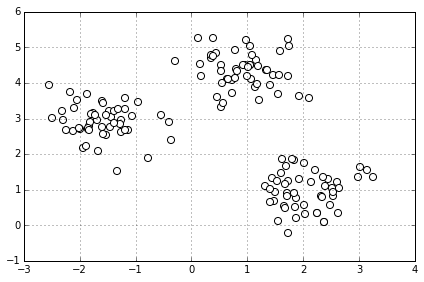

In [4]:
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()

In [5]:
from sklearn.cluster import KMeans

In [6]:
#n_init=10 runs Kmeans 10 times independently with different random centroids
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=0)
y_km = km.fit_predict(X)

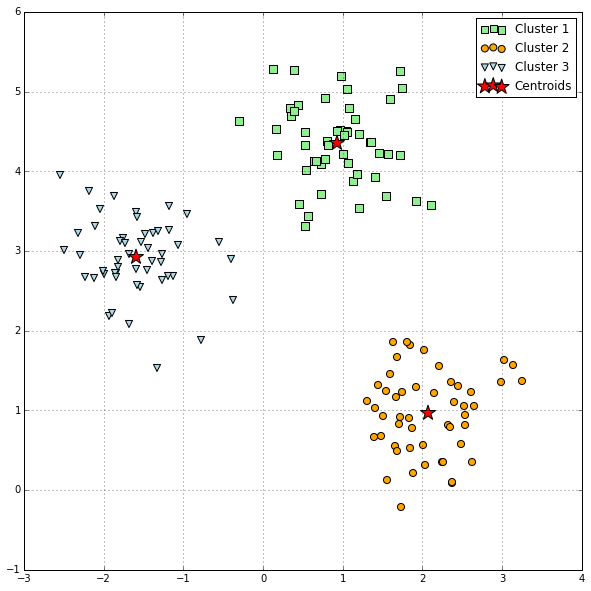

In [8]:
plt.figure(figsize=(10, 10))
plt.scatter(X[y_km==0, 0], X[y_km==0, 1],s=50, c='lightgreen', marker='s', label='Cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1],s=50, c='orange', marker='o', label='Cluster 2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1],s=50, c='lightblue', marker='v', label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.show()

In [9]:
print "Distortion:", km.inertia_

Distortion: 72.47601671


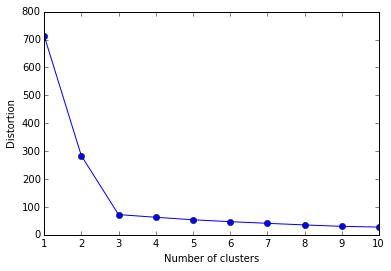

In [10]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel("Distortion")
plt.show()

In [13]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

In [12]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=0)
y_km = km.fit_predict(X)

In [14]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

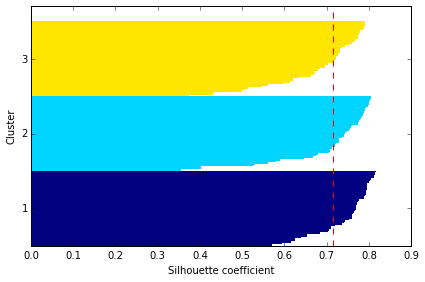

In [15]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()
#average silhouette is close to 0.7, ideal is 1 with maximum inter cluster distance

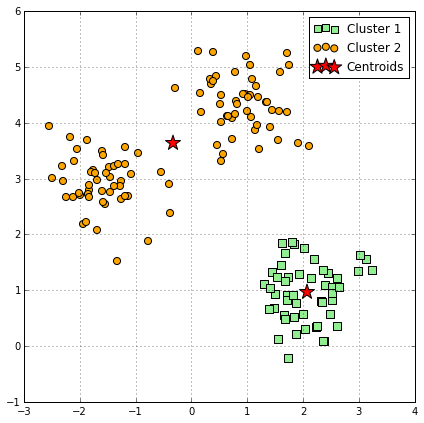

In [17]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=0)
y_km = km.fit_predict(X)

#bad clustering with only 2 centers
plt.figure(figsize=(7, 7))
plt.scatter(X[y_km==0, 0], X[y_km==0, 1],s=50, c='lightgreen', marker='s', label='Cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1],s=50, c='orange', marker='o', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.show()

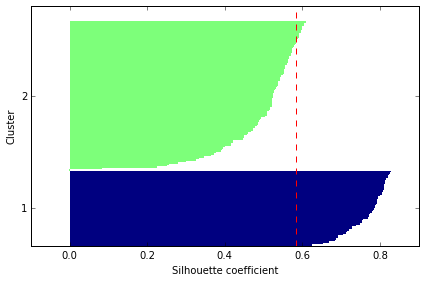

In [18]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [20]:
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10 #5x3 array from random.random then multiplied by 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [21]:
from scipy.spatial.distance import pdist, squareform

In [22]:
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [23]:
from scipy.cluster.hierarchy import linkage

In [24]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean')
    Performs hierarchical/agglomerative clustering on the condensed
    distance matrix y.
    
    y must be a :math:`{n \choose 2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    An :math:`(n-1)` by 4  matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of original
    observations in the newly formed cluster.
    
    The following linkage methods are used to compute the distance
  

In [25]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')

In [26]:
pd.DataFrame(row_clusters, columns=['row label 1', 'row label2', 'distance', '# of items in clust.'],
            index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])
#first and second columns most dissimilar members in each cluster
#3rd column distance between most dissimilar

,row label 1,row label2,distance,# of items in clust.
cluster 1,0,4,3.835396,2
cluster 2,1,2,4.347073,2
cluster 3,3,5,5.899885,3
cluster 4,6,7,8.316594,5


In [27]:
from scipy.cluster.hierarchy import dendrogram

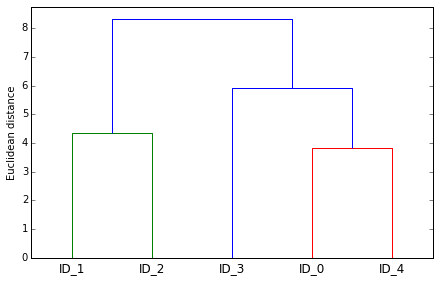

In [28]:
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

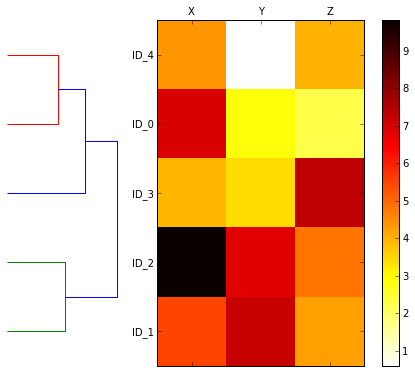

In [34]:
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='right')
df_rowclust = df.ix[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
axd.set_xticks([]) #remove ticks on axis 
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)  #color transition bar
axm.set_xticklabels([''] + list(df_rowclust.columns)) #reassign column names to xtick labels
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print 'Cluster labels: %s' % labels

Cluster labels: [0 1 1 0 0]


In [37]:
from sklearn.datasets import make_moons

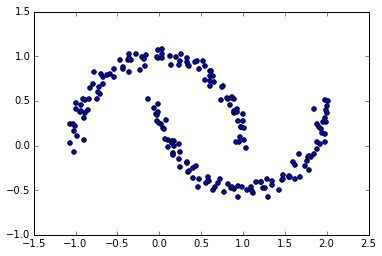

In [38]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

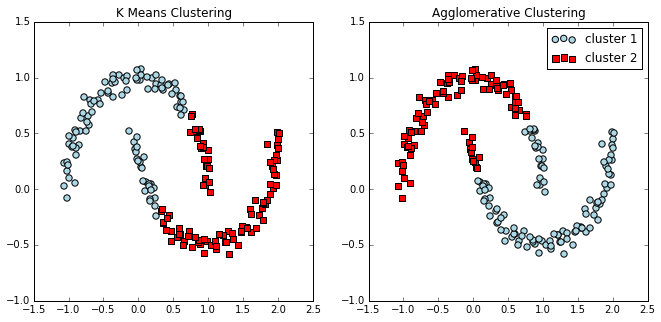

In [42]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0, 0], X[y_km==0, 1], c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km==1, 0], X[y_km==1, 1], c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K Means Clustering')
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0, 0], X[y_ac==0, 1], c='lightblue', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac==1, 0], X[y_ac==1, 1], c='red', marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative Clustering')
plt.legend()
plt.show()

In [43]:
from sklearn.cluster import DBSCAN

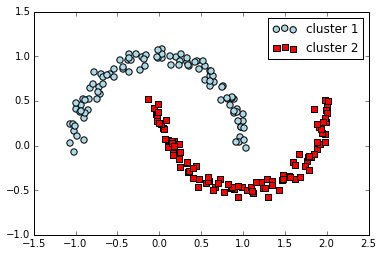

In [44]:
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0, 0], X[y_db==0, 1], c='lightblue', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1, 0], X[y_db==1, 1], c='red', marker='s', s=40, label='cluster 2')
plt.legend()
plt.show()